In [20]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
tsx_data = yf.download('^GSPTSE', start='2018-01-01', end='2025-01-01')

[*********************100%***********************]  1 of 1 completed


In [22]:
tsx_data['Return'] = tsx_data['Close'].pct_change()
tsx_data['MA_30'] = tsx_data['Close'].rolling(window=30).mean()

In [23]:
tsx_data.dropna(inplace=True)

In [24]:
print(tsx_data.describe())

Price          Close          High           Low          Open        Volume  \
Ticker       ^GSPTSE       ^GSPTSE       ^GSPTSE       ^GSPTSE       ^GSPTSE   
count    1728.000000   1728.000000   1728.000000   1728.000000  1.728000e+03   
mean    18753.568982  18833.128399  18665.541038  18753.370548  2.381753e+08   
std      2692.128729   2692.254087   2687.610464   2686.292919  7.992346e+07   
min     11228.500000  11870.599609  11172.700195  11657.299805  0.000000e+00   
25%     16330.275146  16388.175781  16265.874756  16332.325195  1.965212e+08   
50%     19194.400391  19287.050781  19094.049805  19193.399414  2.253821e+08   
75%     20629.524902  20718.874512  20542.225586  20614.875000  2.618818e+08   
max     25691.800781  25843.199219  25684.699219  25743.000000  9.440374e+08   

Price        Return         MA_30  
Ticker                             
count   1728.000000   1728.000000  
mean       0.000342  18676.111117  
std        0.010334   2610.622950  
min       -0.123447

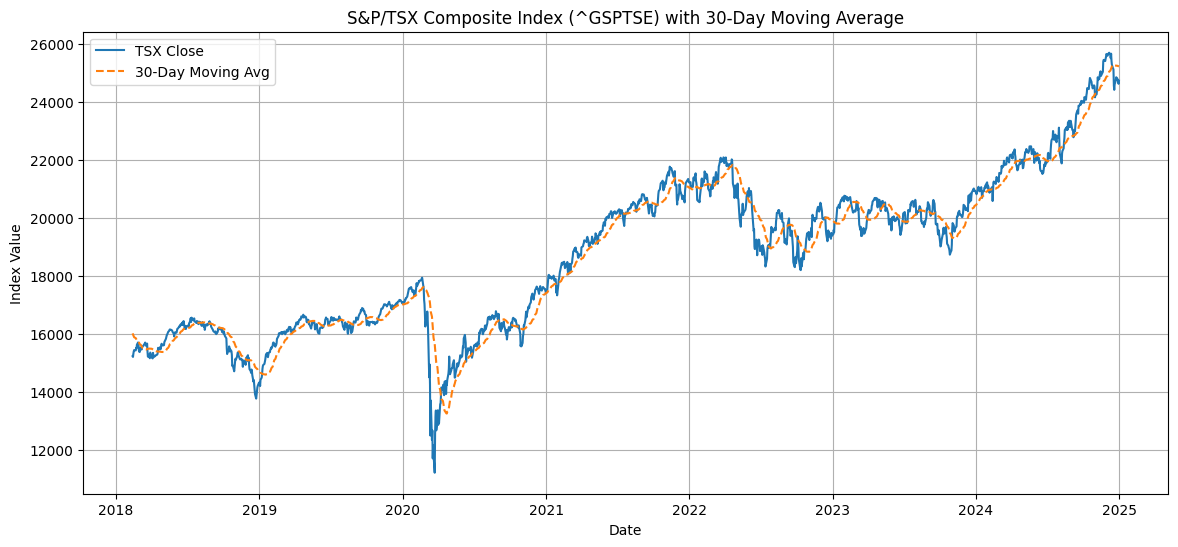

In [25]:
plt.figure(figsize=(14,6))
plt.plot(tsx_data['Close'], label='TSX Close')
plt.plot(tsx_data['MA_30'], label='30-Day Moving Avg', linestyle='--')
plt.title("S&P/TSX Composite Index (^GSPTSE) with 30-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.legend()
plt.grid()
plt.show()

In [26]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(tsx_data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -0.9060039474199899
p-value: 0.7859888018316353


In [27]:
df_ml = tsx_data[['Close']].copy()



In [28]:

for lag in range(1, 8):
    df_ml[f'lag_{lag}'] = df_ml['Close'].shift(lag)

In [29]:

df_ml['roll_mean_7'] = df_ml['Close'].rolling(window=7).mean()
df_ml['roll_std_7'] = df_ml['Close'].rolling(window=7).std()

In [30]:

df_ml.dropna(inplace=True)

In [31]:
df_ml = tsx_data[['Close']].copy()

# Lag features
for lag in range(1, 8):
    df_ml[f'lag_{lag}'] = df_ml['Close'].shift(lag)

# Rolling mean features
df_ml['roll_mean_7'] = df_ml['Close'].rolling(window=7).mean()
df_ml['roll_std_7'] = df_ml['Close'].rolling(window=7).std()

# Drop missing rows after lagging/rolling
df_ml.dropna(inplace=True)


In [32]:
# Use 80% for training, 20% for testing
train_size = int(len(df_ml) * 0.8)
train_ml = df_ml[:train_size]
test_ml = df_ml[train_size:]

print(f"Train shape: {train_ml.shape}")
print(f"Test shape: {test_ml.shape}")


Train shape: (1376, 10)
Test shape: (345, 10)


In [33]:
from pmdarima import auto_arima

stepwise_model = auto_arima(tsx_data['Close'], 
                            start_p=1, start_q=1,
                            max_p=5, max_q=5, 
                            seasonal=False,
                            trace=True,
                            error_action='ignore', 
                            suppress_warnings=True, 
                            stepwise=True)

print(stepwise_model.summary())

ModuleNotFoundError: No module named 'pmdarima'